In [8]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Filtrar por puestos Argentinos de data analyst

In [3]:
df_DA_ARG = df[(df['job_country'] == 'Argentina') & (df['job_title_short'] == 'Data Analyst')]

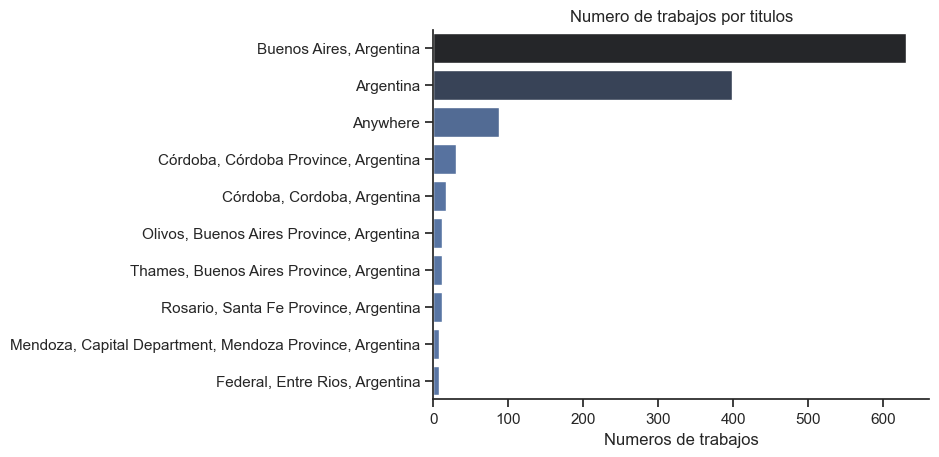

In [9]:
df_plot = df_DA_ARG['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Numero de trabajos por titulos')
plt.xlabel('Numeros de trabajos')
plt.ylabel('')
plt.show()

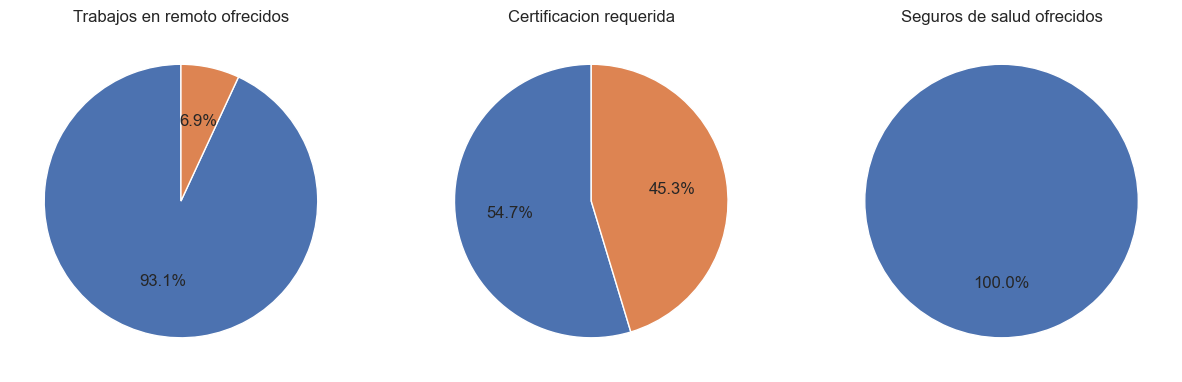

In [15]:
dict_column = {
    'job_work_from_home': 'Trabajos en remoto ofrecidos',
    'job_no_degree_mention': 'Certificacion requerida',
    'job_health_insurance': 'Seguros de salud ofrecidos'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    conteo = df_DA_ARG[column].value_counts()
    ax[i].pie(df_DA_ARG[column].value_counts(), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

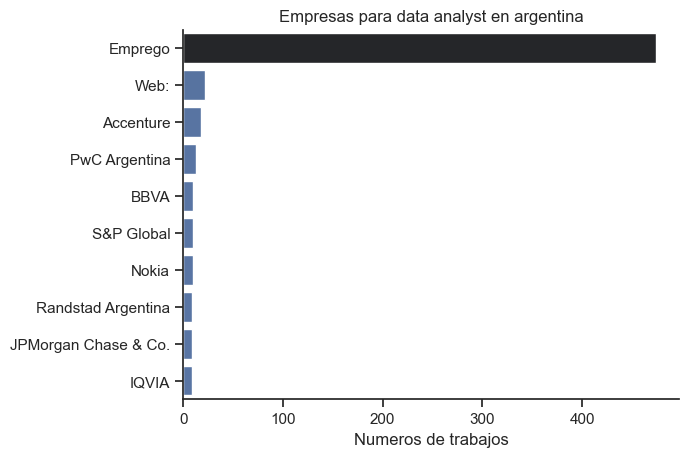

In [17]:
df_plot = df_DA_ARG['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Empresas para data analyst en argentina')
plt.xlabel('Numeros de trabajos')
plt.ylabel('')
plt.show()